<a href="https://colab.research.google.com/github/wenqilyu/Capstone/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Capstone

import re
import pandas as pd
! pip install jieba
! pip install wordcloud
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud 
import collections 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Capstone


In [ ]:
tweets = pd.read_csv('output1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,23,24,29,30,31,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
lang = pd.read_csv('output1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,23,24,29,30,31,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
tweets['language']=lang['Language']

In [ ]:
tweets=tweets[tweets['Language']=='en']

In [ ]:
tweets=tweets[tweets['text'].dropna()]

In [ ]:
tweets_before_clean=pd.read_csv('all_id_combined.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
tweets

,Unnamed: 0,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,language
0,0,NaN,Tue Jul 14 14:28:11 +0000 2020,NaN,NaN,NaN,0,1283045634879234051,NaN,NaN,NaN,en,NaN,NaN,1.282771e+18,1,1283037819699634176.0,HellAnnBack,"<a href=""http://twitter.com/download/android"" ...",mask nazis guy mayor tn spike covid case good ...,https://twitter.com/jellison_pat/status/128304...,Sun Jul 28 17:11:46 +0000 2019,1.155526e+18,False,"Sense of humor, think Far Side. Thinks outside...",83756.0,784.0,823.0,0.0,NaN,Pat Jellison,jellison_pat,27989.0,NaN,NaN,False,en
1,1,NaN,Tue Jul 14 14:28:11 +0000 2020,NaN,NaN,NaN,0,1283045635235745794,NaN,NaN,NaN,en,NaN,NaN,1.282983e+18,111,1283042531740200960.0,RLHeinrichs,"<a href=""http://twitter.com/download/iphone"" r...",uh guy orlando health answer question confirm ...,https://twitter.com/ladyoutlander72/status/128...,Sun Feb 25 21:22:14 +0000 2018,9.678724e+17,False,"Constitutional Conservative, wife, mother, mem...",5555.0,5986.0,6104.0,1.0,"Texas, USA",Kricket Dalais,ladyoutlander72,23356.0,NaN,NaN,False,en
2,2,NaN,Mon Jul 13 09:47:32 +0000 2020,COVID19,NaN,https://twitter.com/catalayahere/status/128241...,1,1282612619497676800,NaN,NaN,NaN,en,NaN,False,1.282418e+18,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",eye opening thread 1 mortality,https://twitter.com/DrMphoMalatji/status/12826...,Mon Sep 20 22:33:46 +0000 2010,1.930771e+08,False,•Philosopher\n•Indigenous Knowledge Librarian\...,3590.0,4414.0,3609.0,1.0,Johannesburg,Dr Mpho Malatji,DrMphoMalatji,7099.0,NaN,NaN,False,en
3,3,NaN,Mon Jul 13 09:38:04 +0000 2020,NaN,NaN,NaN,0,1282610233714585600,NaN,NaN,NaN,en,NaN,NaN,NaN,99,1282582071408504832.0,ABC,"<a href=""http://twitter.com/download/iphone"" r...",month global pandemic study show covid19 exace...,https://twitter.com/ksev4/status/1282610233714...,Fri Apr 01 22:05:36 +0000 2011,2.757350e+08,False,My heart wants to sigh like a chime that flies...,732909.0,1447.0,718.0,30.0,"Wells, Maine",Katherine H Sevigney,ksev4,143442.0,NaN,http://KHSJourneyTo30.weebly.com,False,en
6,6,NaN,Tue Jul 14 14:25:46 +0000 2020,NaN,NaN,NaN,0,1283045026436657156,NaN,NaN,NaN,en,NaN,NaN,NaN,306,1283039051407384576.0,MarshallProj,"<a href=""http://twitter.com/download/android"" ...",15yearold michigan incarcerate coronavirus pan...,https://twitter.com/sianlikeyarn/status/128304...,Tue Jul 12 12:03:43 +0000 2011,3.339881e+08,False,Cannabis copywriter. Other than that I'm going...,118324.0,7497.0,3243.0,98.0,South Africa,siândenfreude,sianlikeyarn,14818.0,NaN,NaN,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918040,581501,NaN,Thu Mar 04 01:47:17 +0000 2021,NaN,NaN,NaN,0,1367290520305819650,NaN,NaN,NaN,en,NaN,NaN,1.367243e+18,4880,1367265900798349312.0,JulianCastro,"<a href=""http://twitter.com/download/iphone"" r...",total lie asylum seeker test enter \n\n worrie...,https://twitter.com/evahagendazs/status/136729...,Tue Dec 09 01:24:32 +0000 2014,2.911964e+09,False,"I ❤️ the ocean, dancing, animals especially Ca...",80917.0,2118.0,1903.0,23.0,NaN,Eva Michelle,evahagendazs,66648.0,NaN,NaN,False,en
918042,581503,NaN,Thu Mar 04 01:40:23 +0000 2021,NaN,NaN,NaN,0,1367288782026899458,NaN,NaN,NaN,pt,NaN,NaN,NaN,17,1367288113723244288.0,marcobellojr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",lockdown é não permitir que você saia de casa ...,https://twitter.com/afastademim/status/1367288...,Mon Sep 17 16:33:23 +0000 2018,1.041727e+18,False,Pai da Sol. Corintiano. Pace

In [ ]:
tweets.columns.values

array(['Unnamed: 0', 'coordinates', 'created_at', 'hashtags', 'media',
       'urls', 'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url',
       'user_created_at', 'user_id', 'user_default_profile_image',
       'user_description', 'user_favourites_count',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_location', 'user_name', 'user_screen_name',
       'user_statuses_count', 'user_time_zone', 'user_urls',
       'user_verified', 'language'], dtype=object)

## Statistics for the length of tweets

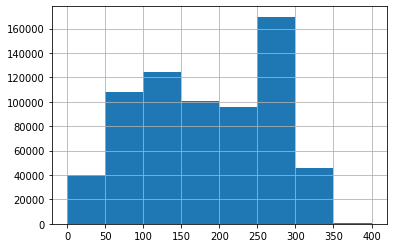

In [ ]:
# the length of tweets before deleting the stop words
tweets_before_clean['text'].str.len().hist(bins=[0,50,100,150,200,250,300,350,400])

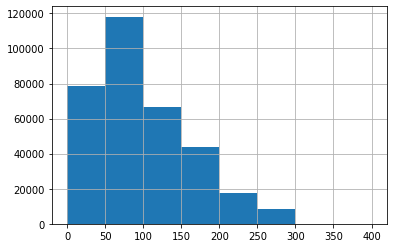

In [ ]:
# the length of tweets after deleting the stop words
tweets['text'].str.len().hist(bins=[0,50,100,150,200,250,300,350,400])

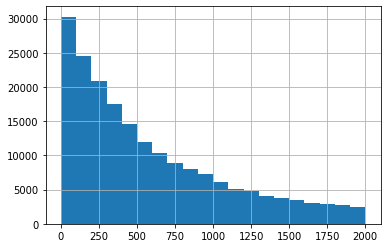

In [ ]:
tweets['user_friends_count'].hist(bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])

## Frequency of words

In [ ]:
# count the words
words_list=str(tweets['text'].tolist()).split()
word_counts = collections.Counter(words_list)

In [ ]:
word_counts['health']

18525

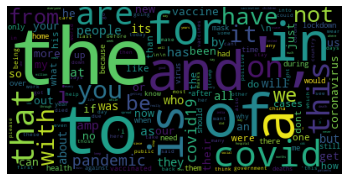

In [ ]:
word_char=WordCloud()
word_plot=word_char.fit_words(word_counts)
plt.imshow(word_plot)
plt.axis("off")
plt.show()

In [ ]:
dict(sorted(word_counts.items(), key=lambda x: x[0]))